## Guía 1 - Ejercicio 01 - Versión 02

Se tiene una placa cuadrada de aluminio cuyos bordes están en las condiciones que se indican en la
figura: tres lados a temperaturas fijas y otro, el inferior, aislado térmicamente (flujo de calor igual a
cero). Encuentre, utilizando el método de diferencias finitas, los valores de temperatura y flujo de
calor para cada punto. Utilice primero la grilla señalada y luego generalice el problema a un número
variable de nodos en cada eje de coordenadas. Haga un estudio del tiempo de cálculo en función del
tamaño del sistema

Hago el programa con condiciones de contorno a elección. 

#### Contorno a Elección ####

In [1]:
import numpy as np
import matplotlib.pyplot as plt
# import copy as cp
# import random
# import matplotlib.pyplot as plt

np.set_printoptions(linewidth=100)

In [2]:
Nx = 10
Ny = 10

Tleft = 75
Tright = 50
Tup = 100
Tdown = 0
initialT = [Tleft, Tright, Tup, Tdown]

# Las condiciones de contorno me dicen si es por flujo o por temperatura fija.
# Si es = 1, entonces tengo flujo. Sino, tengo temperatura fija.
cLeft = False
cRight = False
cUp = False
cDown = True
boundaryCond = [cLeft, cRight, cUp, cDown]

# Flujos para los lados, seteo = 0, pero va a depender de si está
# la condición de flujo o no para activarlo.
qLeft = 0
qRight = 0
qUp = 0
qDown = 0


matrix = np.eye(Nx*Ny, Nx*Ny)
vectorB = np.zeros(Nx*Ny)
beta = Nx / Ny

In [3]:
# Defino las derivadas
dx = 1 / (Nx + 1)
dy = 1 / (Ny + 1)

flowX = np.zeros([Nx, Ny])
flowY = np.zeros([Nx, Ny])


# Hago una grilla de Nx - 1  x Ny - 1

# El astype para definir que sean todos números enteros
x = np.linspace(0, Nx - 1, Nx).astype(int)
y = np.linspace(0, Ny - 1, Ny).astype(int)
X, Y = np.meshgrid(x, y)

In [4]:
'''
Inicialmente, voy a hacer la matriz de temperaturas fijas,
Solo va a cambiar si tengo flujo. for i in range(1, Nx - 1):
'''
for i in range(1, Nx - 1):
    for j in range(1, Ny - 1):
        k = i + j * Nx
        # print(k)
        matrix[k, k - Nx] = beta ** 2
        matrix[k, k - 1] = 1
        matrix[k, k] = - 2 * (1 + beta ** 2)
        matrix[k, k + 1] = 1
        matrix[k, k + Nx] = beta ** 2

In [5]:
# Genero el vector B para temperaturas fijas.
for i in range(0, Nx):
    for j in range(0, Ny):
        k = i + j * Nx
        # print(k)
        # initialT = [Tleft, Tright, Tup, Tdown]
        if i == 0:        # Borde izquierdo
            if j == 0:
                vectorB[k] = (initialT[0] + initialT[2]) / 2
            elif j == Ny - 1:
                vectorB[k] = (initialT[0] + initialT[3]) / 2
            else:
                vectorB[k] = initialT[0]

        elif i == Nx - 1:  # Borde derecho
            if j == 0:
                vectorB[k] = (initialT[1] + initialT[2]) / 2
            elif j == Ny - 1:
                vectorB[k] = (initialT[1] + initialT[3]) / 2
            else:
                vectorB[k] = initialT[1]

        elif j == 0:       # Borde superior
            vectorB[k] = initialT[2]

        elif j == Ny:      # Borde inferior
            vectorB[k] = initialT[3]

In [6]:
'''
# Ahora, evalúo si tengo flujo o no, y hago las modificaciones.
# Si las condiciones = 1, entonces
# boundaryCond = [cLeft, cRight, cUp, cDown]
# Para i e [1, Nx-1] y j e [1, Ny-1], para no pisar las esquinas.
'''
if boundaryCond[0] is True:  # Left
    for j in range(1, Ny - 1):
        k = j * Nx
        vectorB[k] = 2 * qLeft * dx

        matrix[k, k + 1] = 2 - 2 * qLeft * dx
        matrix[k, k - Nx] = beta ** 2
        matrix[k, k] = - 2 * (1 + beta ** 2)
        matrix[k, k + Nx] = beta ** 2

if boundaryCond[1] is True:  # Right
    for j in range(1, Ny - 1):
        k = Ny - 1 + j * Nx  # //////////////////////////////////////////// k = Ny + j * Nx
        vectorB[k] = 2 * qRight * dx

        matrix[k, k - 1] = 2 - 2 * qRight * dx
        matrix[k, k - Nx] = beta ** 2
        matrix[k, k] = - 2 * (1 + beta ** 2)
        matrix[k, k + Nx] = beta ** 2
'''
if boundaryCond[2] is True:  # Up
    for i in range(1, Ny - 1):
        k = i
        vectorB[k] = 2 * qUp * dy

        matrix[k, k - 1] = 1
        matrix[k, k + Nx] = 2 * beta ** 2 - 2 * qUp * dy
        matrix[k, k] = - 2 * (1 + beta ** 2)
        matrix[k, k + 1] = 1

if boundaryCond[3] is True:  # Down
    k = 0
    for i in range(1, Nx - 1):
        k = i + Ny * Nx
        vectorB[k] = 2 * qDown * dy

        matrix[k, k - 1] = 1
        matrix[k, k - Nx] = 2 - 2 * qDown * dx
        matrix[k, k] = - 2 * (1 + beta ** 2)
        matrix[k, k + 1] = 1
'''

if boundaryCond[3] is True:  # Up
    for i in range(1, Nx - 1):
        k = i + Nx * (Ny - 1)
        vectorB[k] = 2 * qUp * dy

        matrix[k, k - 1] = 1
        matrix[k, k - Nx] = 2 - 2 * qUp * dy
        matrix[k, k] = - 2 * (1 + beta ** 2)
        matrix[k, k + 1] = 1

if boundaryCond[3] is True:  # Down
    for i in range(1, Ny - 1):
        k = i
        vectorB[k] = 2 * qDown * dy

        matrix[k, k - 1] = 1
        matrix[k, k + Nx] = 2 * beta ** 2 - 2 * qDown * dy
        matrix[k, k] = - 2 * (1 + beta ** 2)
        matrix[k, k + 1] = 1

In [7]:
T = np.linalg.solve(matrix, vectorB)

In [8]:
tempMatrix = np.zeros([Nx, Ny])
for i in range(0, Nx):
    for j in range(0, Ny):
        k = i + j * Nx
        tempMatrix[j, i] = T[k]

Ojo que las matrices en Python quedan definidos como `matrix[filas, columnas]`

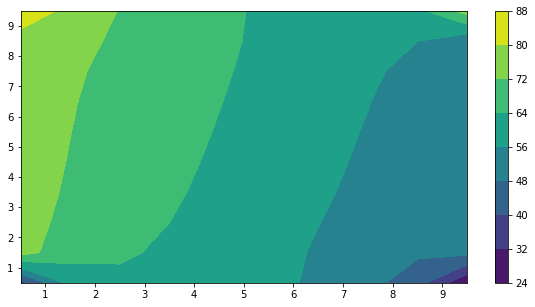

In [12]:
# plt.imshow(tempMatrix)
plt.contourf(tempMatrix)
plt.colorbar()

> No entiendo por qué me queda mal la distribución de calor

In [10]:
for i in range(Nx - 1):
    for j in range(Ny - 1):
        flowX[j, 0] = (tempMatrix[j, 1] - tempMatrix[j, 0]) / dx
        flowX[j, i] = (tempMatrix[j, i+1] - tempMatrix[j, i-1]) / (2 * dx)
        flowX[j, Nx-1] = (tempMatrix[j, Nx-1] - tempMatrix[j, Nx-2]) / dx

        flowY[0, i] = (tempMatrix[1, i] - tempMatrix[0, i]) / dy
        flowY[j, i] = (tempMatrix[j+1, i] - tempMatrix[j-1, i]) / (2 * dy)
        flowY[Ny-1, i] = (tempMatrix[Ny-1, i] - tempMatrix[Ny-2, i]) / dy

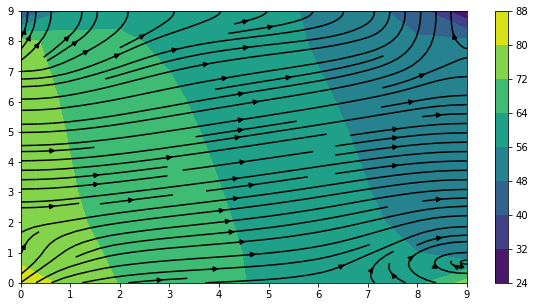

In [16]:
plt.rc('figure', figsize=(10, 5))
plt.contourf(tempMatrix)
plt.colorbar()
plt.streamplot(X, Y, -flowX, -flowY, color='k')  
# Con el menos en el flow me queda que va desde mayor a menor temperatura.